Begin by importing the necessary Python modules: cdflib, NumPy, and matplotlib.

In [6]:
import cdflib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import datetime
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


First, lets print the contents of the CDF file containing the HIS data.

In [7]:
# Load in data.
date = '20220510'
cdf_file = cdflib.CDF('solo_L3_swa-his-comp_{0}_10min_V01.cdf'.format(date))

# Print contents.
for key, value in cdf_file.cdf_info().items():
    if isinstance(value, list):
        print(f"{key}: \n")
        for var in value:
            print(f"   {var}")
        print("\n")
    else:
        print(f"{key}: {value}\n")

CDF: /Users/tjeddy/Dropbox (University of Michigan)/Research/SolO/HIS-demo/solo_L3_swa-his-comp_20220510_10min_V00_revO.cdf

Version: 3.8.0

Encoding: 6

Majority: Column_major

rVariables: 



zVariables: 

   EPOCH
   ACCUM_SECONDS
   QUALITY_FLAG
   QUALITY_BITMASK
   AZIMUTH_SOURCE
   SW_TYPE
   NUMBER_OF_SCANS
   HE2_DENS
   HE2_DENS_ERR
   HE2_DENS_QF
   HE2_TH_VEL
   HE2_TH_VEL_ERR
   HE2_TH_VEL_QF
   HE2_VEL
   HE2_VEL_ERR
   HE2_VEL_QF
   C5_DENS
   C5_DENS_ERR
   C5_DENS_QF
   C5_TH_VEL
   C5_TH_VEL_ERR
   C5_TH_VEL_QF
   C5_VEL
   C5_VEL_ERR
   C5_VEL_QF
   O6_DENS
   O6_DENS_ERR
   O6_DENS_QF
   O6_TH_VEL
   O6_TH_VEL_ERR
   O6_TH_VEL_QF
   O6_VEL
   O6_VEL_ERR
   O6_VEL_QF
   FE10_DENS
   FE10_DENS_ERR
   FE10_DENS_QF
   FE10_TH_VEL
   FE10_TH_VEL_ERR
   FE10_TH_VEL_QF
   FE10_VEL
   FE10_VEL_ERR
   FE10_VEL_QF
   O_CHARGE_DIST
   O_CHARGE_DIST_ERR
   O_CHARGE_DIST_QF
   C_CHARGE_DIST
   C_CHARGE_DIST_ERR
   C_CHARGE_DIST_QF
   FE_CHARGE_DIST
   FE_CHARGE_DIST_ERR
   FE_CH

Next, we'll print the contents of an indvidual variable in the CDF file. Specifically, let's take a look at the carbon charge state distributions.

In [8]:
# Choose variable.
variable = 'C_CHARGE_DIST'

# Print contents.
print(f"{variable} Variables:", "\n")
for key, val in cdf_file.varinq(variable).items():
    print(f"   {key:<21} : {val}")

print("\n")

print(variable, " Attributes:", "\n")
for key, val in cdf_file.varattsget(variable).items():
    print(f"   {key:<21} : {val}")

C_CHARGE_DIST Variables: 

   Variable              : C_CHARGE_DIST
   Num                   : 46
   Var_Type              : zVariable
   Data_Type             : 44
   Data_Type_Description : CDF_FLOAT
   Num_Elements          : 1
   Num_Dims              : 1
   Dim_Sizes             : [3]
   Sparse                : No_sparse
   Last_Rec              : 90
   Rec_Vary              : True
   Dim_Vary              : [-1]
   Pad                   : [-1.e+30]
   Compress              : 6
   Block_Factor          : 5462


C_CHARGE_DIST  Attributes: 

   CATDESC               : Carbon charge distribution
   DEPEND_0              : EPOCH
   DEPEND_1              : C_CHARGES
   DISPLAY_TYPE          : time_series
   FIELDNAM              : C_CHARGE_DIST
   FILLVAL               : -9.999999848243207e+30
   FORMAT                : E10.3
   LABL_PTR_1            : C_CHARGE_LABELS
   SCALEMAX              : 1.0
   SCALEMIN              : 0.0
   SCALETYP              : linear
   UNITS               

Let's create time analysis plots of O6+ velocity and temperature alongside the charge state distributions for oxygen, carbon, and iron. Overlay the oxygen and carbon charge state distributions with the average charge state for each respective element. Moreover, we'll plot O7+/O6+ and Fe/O ratios in addition to average iron charge state and accumulation time for the data.

Exception ignored in: <function CDF.__del__ at 0x7fa149dc3910>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/HIS_Demo/lib/python3.10/site-packages/cdflib/cdfread.py", line 181, in __del__
    if self.temp_file is not None:
AttributeError: 'CDF' object has no attribute 'temp_file'
Exception ignored in: <function CDF.__del__ at 0x7fa149dc3910>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/HIS_Demo/lib/python3.10/site-packages/cdflib/cdfread.py", line 181, in __del__
    if self.temp_file is not None:
AttributeError: 'CDF' object has no attribute 'temp_file'


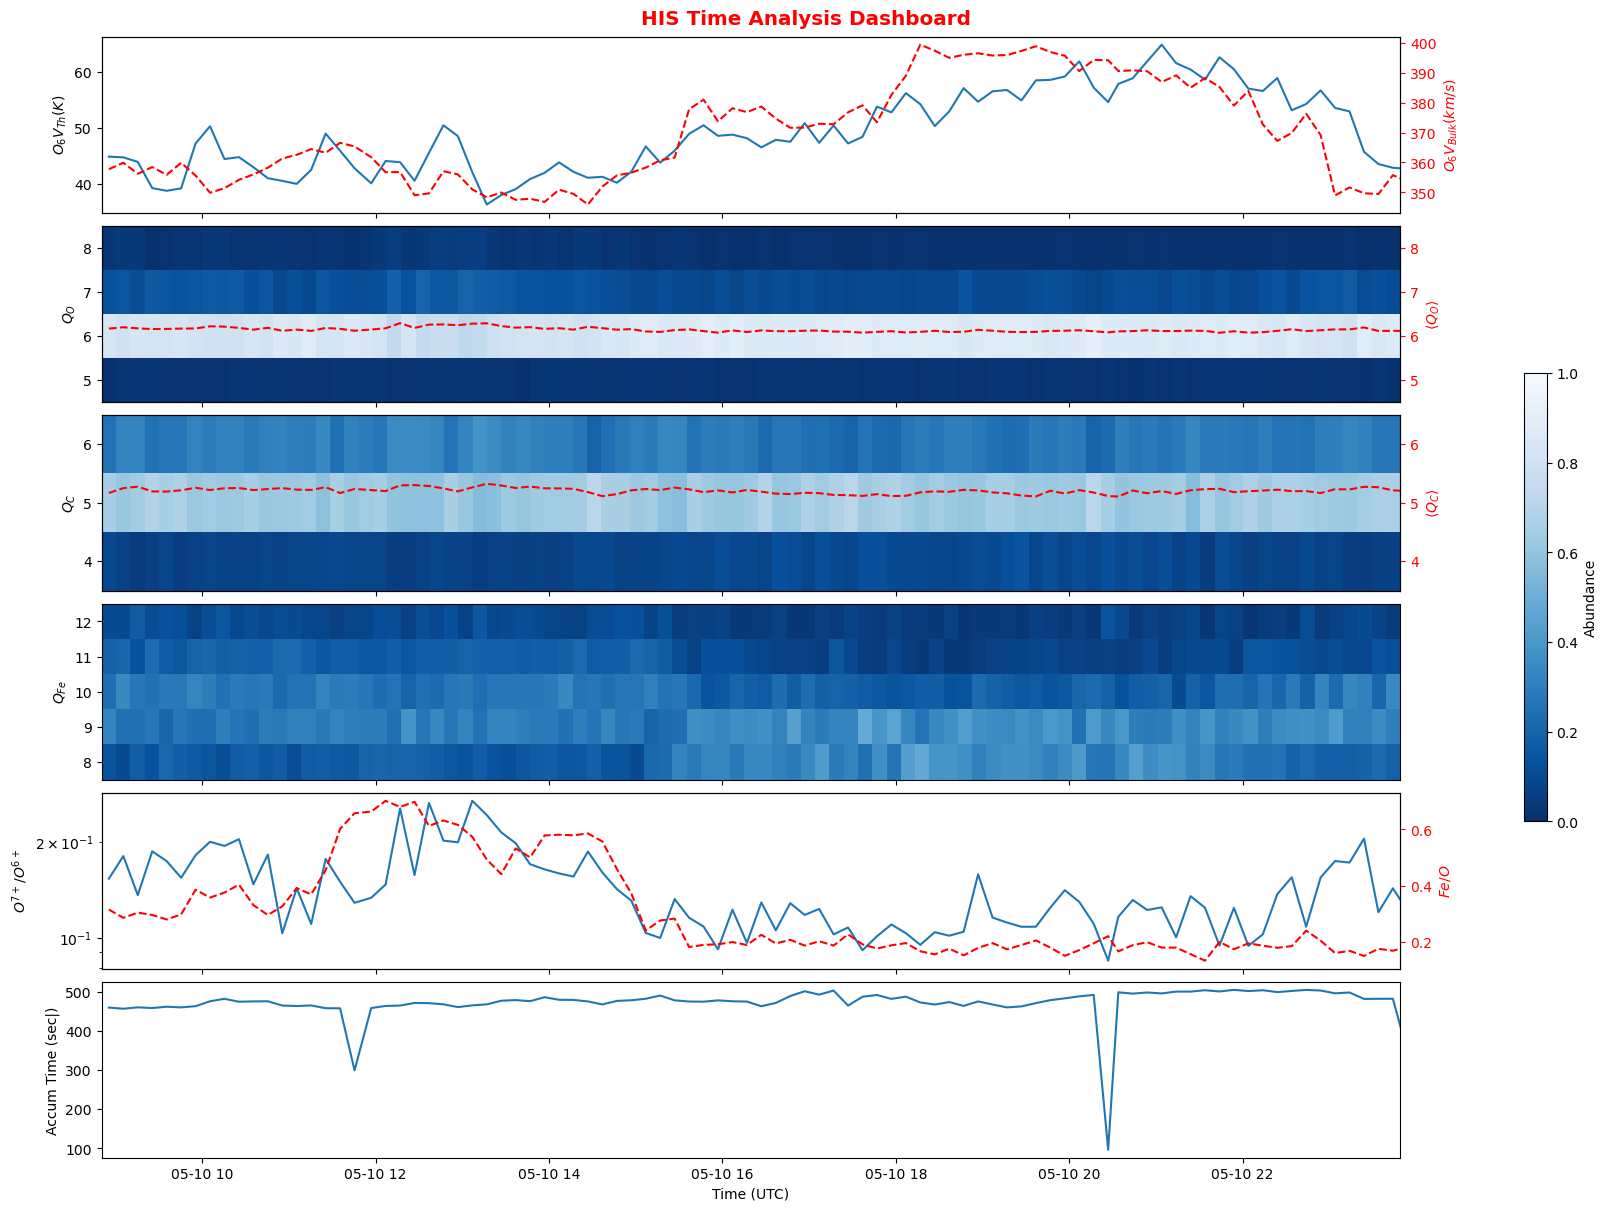

In [9]:
# Produce an array of datetime values from the Epoch variable. Convert
# nanoseconds to microseconds and add to start date January 01, 2000.
start_date = datetime.datetime(2000, 1, 1, 12)
time = [
    start_date + datetime.timedelta(microseconds=time / 1e3)
    for time in cdf_file.varget("EPOCH")
]

# Create plotting figure and axes.
fig, ax = plt.subplots(
    6, 1, figsize=(16, 12), sharex=True, constrained_layout=True
)
fig.suptitle(
    "HIS Time Analysis Dashboard", color="red", size="x-large", weight="bold"
)

# Plot O6+ velocity and temperature sharing the same x-axis.
ax[0].plot(time, cdf_file.varget("O6_TH_VEL"))
ax[0].set_ylabel(r"$O_6 V_{Th} (K)$")

ax0 = ax[0].twinx()
ax0.plot(time, cdf_file.varget("O6_VEL"), linestyle="--", color="red")
ax0.set_ylabel(r"$O_6 V_{Bulk} (km/s)$", color="red")
ax0.tick_params(axis="y", colors="red")

# Plot charge states as heatmaps. Overlay average charge state for oxygen and carbon.
num_start, num_stop = mdates.date2num(time[0]), mdates.date2num(time[-1])
num_step = (num_stop - num_start) / len(time)
x = np.arange(num_start, num_stop, num_step)
o_y, c_y, fe_y = np.arange(5,9,1), np.arange(4, 7, 1), np.arange(8, 13, 1)

ax[1].pcolormesh(
    *np.meshgrid(x, o_y),
    np.transpose(cdf_file.varget("O_CHARGE_DIST")),
    cmap="Blues_r",
    vmin=0., vmax=1.
)
ax[1].set_ylabel(r"$Q_{O}$")

ax1 = ax[1].twinx()
ax1.plot(time, cdf_file.varget("O_AVE_CHARGE"), linestyle="--", color="red")
ax1.set_ylabel(r"$\langle Q_O \rangle$", color="red")
ax1.set_ylim(4.5, 8.5)
ax1.tick_params(axis="y", colors="red")

pcm = ax[2].pcolormesh(
    *np.meshgrid(x, c_y),
    np.transpose(cdf_file.varget("C_CHARGE_DIST")),
    cmap="Blues_r",
    vmin=0., vmax=1.
)
ax[2].set_ylabel(r"$Q_{C}$")
ax[2].yaxis.set_major_locator(MaxNLocator(integer=True))

ax2 = ax[2].twinx()
ax2.plot(time, cdf_file.varget("C_AVE_CHARGE"), linestyle="--", color="red")
ax2.set_ylabel(r"$\langle Q_C \rangle$", color="red")
ax2.set_ylim(3.5, 6.5)
ax2.tick_params(axis="y", colors="red")
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

# Limit iron distribution data to the charge states released with level three data.
fe_dist_data = np.delete(
    cdf_file.varget("FE_CHARGE_DIST"),
    [0, 1, 7, 8, 9, 10, 11, 12, 13, 14],
    axis=1,
)
ax[3].pcolormesh(
    *np.meshgrid(x, fe_y),
    np.transpose(fe_dist_data), 
    cmap="Blues_r",
    vmin=0., vmax=1.
)
ax[3].set_ylabel(r"$Q_{Fe}$")

cbar = fig.colorbar(pcm, ax=ax, shrink=0.4)
cbar.ax.set_ylabel("Abundance")

# Plot O+7/O+6 ratio, average Fe charge state, Fe/O abundance, and accumulation time.
ax[4].plot(time, cdf_file.varget("O7_O6_RATIO"))
ax[4].set_yscale("log")
ax[4].set_ylabel(r"$O^{7+} / O^{6+}$")

ax4 = ax[4].twinx()
ax4.plot(time, cdf_file.varget("FE_O_ABUN"), linestyle="--", color="red")
ax4.set_ylabel(r"$Fe / O$", color="red")
ax4.tick_params(axis="y", colors="red")

ax[5].plot(time, cdf_file.varget("ACCUM_SECONDS"))
ax[5].set_ylabel("Accum Time (sec|)")

ax[5].set_xlabel('Time (UTC)')

# Save results.
plt.savefig("HIS_time_analysis_{0}.png".format(date))